In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class WeightsInitialization:
    def __init__(self, L_in, L_out):
        self.L_in = L_in
        self.L_out = L_out
        self.weight = None

    def InitializeLayer(self):
        L = np.random.rand(self.L_out, self.L_in + 1) * 2 - 1
        self.weight = L

In [3]:
class NeuralNet:
    def __init__(self, hidden_layers):
        self.w = []
        self.hidden_layers = hidden_layers
        self.activation = []
        self.ai = None
        self.delta = None
        self.error = None
        self.cost = []

    def Weights(self):
        for i in range(0, self.hidden_layers + 1):
            print("enter weights' details of layers", i + 1, i + 2)
            lin, lout = input("enter no of inputs and outputs:").split()
            self.w.append(WeightsInitialization(int(lin), int(lout)))

        for i in range(0, self.hidden_layers + 1):
            self.w[i].InitializeLayer()

    @staticmethod
    def SigmoidActivation(z):  # use the sigmoid activation for only classification problem
        return 1 / (1 + np.exp(-z))

    def dSigmoid(self, z):  # use sigmoid derivative for classification problem only
        return self.SigmoidActivation(z) * (1 - self.SigmoidActivation(z))

    def ForwardProp(self, X):
        self.activation = []
        self.activation.append(X)
        total_layers = self.hidden_layers + 2
        self.ai = X
        for i in range(0, total_layers - 1):
            input = self.ai
            hyp = self.SigmoidActivation(np.dot(self.w[i].weight[:, 1:], input) + self.w[i].weight[:, 0])
            self.activation.append(hyp)
            self.ai = hyp
        return self.ai

    def BackProp(self, y, l_rate, m):
        y1 = np.zeros(10)
        y1[y] = 1
        y = y1
        self.error = y - self.ai
        for i in range(self.hidden_layers, -1, -1):
            # finding delta
            self.delta = self.error * self.dSigmoid(self.activation[i + 1])

            # finding the weight gradient wrt error and updating it
            w_update = self.activation[i] * self.delta[:, np.newaxis]
            b_update = self.delta
            self.w[i].weight[:, 1:] += (1 / m) * l_rate * w_update
            self.w[i].weight[:, 0] += (1 / m) * l_rate * b_update

            # back-propagating error for the previous layer
            self.error = np.dot(self.w[i].weight[:, 1:].T, self.delta)

    def costFunc(self, hyp, y, m):
        return np.sum(np.subtract(hyp, y) ** 2) / m

    def l_curves(self, iters):
        sns.set()
        plt.figure(dpi=100,figsize=(6,4))
        iters = [i * 500 for i in range(iters)]
        plt.plot(iters, self.cost,color="red")
        plt.xlabel("iterations")
        plt.ylabel("cost")
        plt.title("cost as a function of iterations")
        plt.show()

    def Train(self, X, y, iters, l_rate):
        for i in range(0, iters + 1):
            hyp = []
            for j in range(0, len(X)):
                h = self.ForwardProp(X[j])
                self.BackProp(y[j], l_rate, len(X))
                hyp.append(h.argmax())
            if i % 500 == 0:
                self.cost.append(self.costFunc(hyp, y, len(X)))
        return hyp, h

    def predict(self, X):
        pred=[]
        for i in X:
            p = self.ForwardProp(i)
            pred.append(p.argmax())
        return pred

    def accuracy(self,X,y):
        y_pred = np.array(self.predict(X))
        return (((y_pred == y).astype(int)).mean())*100

enter the no of hidden layers:  1


enter weights' details of layers 1 2


enter no of inputs and outputs: 64 32


enter weights' details of layers 2 3


enter no of inputs and outputs: 32 10



training...

training accuracy: 95.000 %

prediction: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


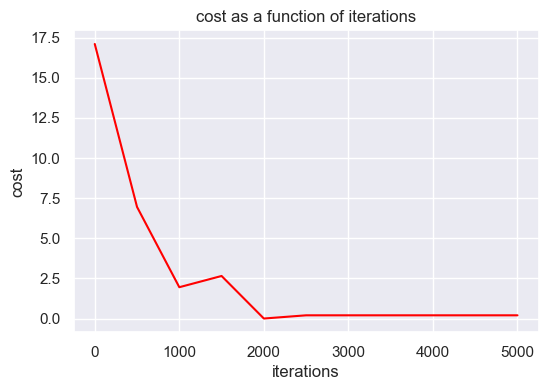

In [7]:

hidden_layers = int(input("enter the no of hidden layers: "))

nn = NeuralNet(hidden_layers)

nn.Weights()  # random initialization of weights

digits = load_digits()

X = [digits.data[i] for i in range(20)]
y = [digits.target[i] for i in range(20)]

initial = []

for i in X:
    a = nn.ForwardProp(i)
    initial.append(a)

# print("\n initial hypothesis: ", np.array(initial))

print("\ntraining...")

hyp, h = nn.Train(X, y, iters=5000, l_rate=0.008)


#print("\nfinal hypothesis:", np.array(hyp))
# print("h:", h)
#print("\nexpected output:", y)

print("\ntraining accuracy: %0.3f" % nn.accuracy(X, y), "%")

print("\nprediction:", nn.predict([digits.data[i] for i in range(20, 30)]))

nn.l_curves(iters=11)
